In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd

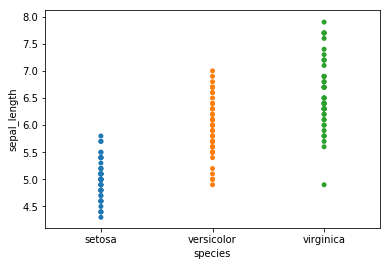

In [2]:
iris = sns.load_dataset("iris")
iris.head()
sns.stripplot(x='species', y='sepal_length', data=iris, jitter=False)#True)
#sns.pairplot(iris, hue='species', diag_kind='kde')

In [3]:
print(iris['species'][1])

setosa


In [4]:
#对数据进行编码，修改成DataFrame格式
df = iris.query("species == ('setosa', 'versicolor')")
y0 = pd.Categorical(df['species']).codes
x0 = df['sepal_length'].values
#print(x0, y0)

C:\Users\Forry\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -41.726, ||grad|| = 3.5299e-05: 100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 590.48it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 11000/11000 [00:56<00:00, 195.48draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5BE376F98>,
      dtype=object)

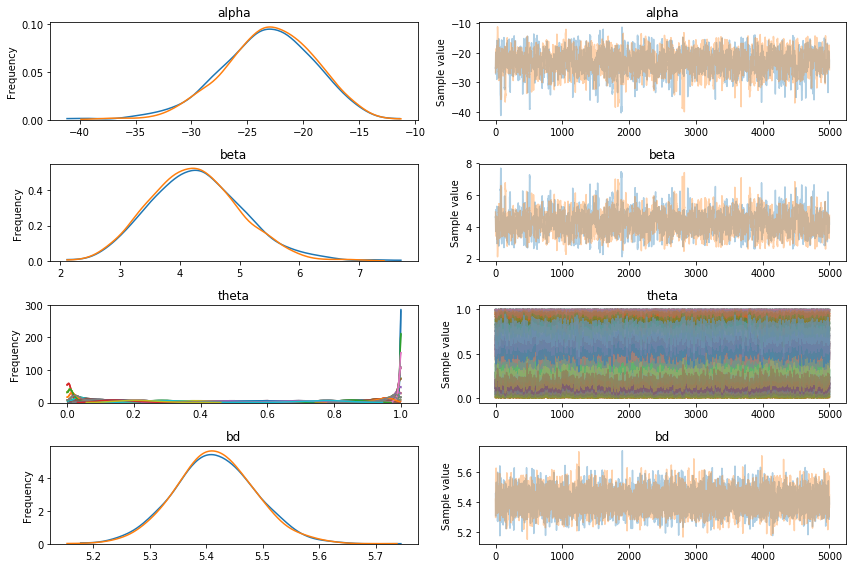

In [5]:
with pm.Model() as model_a:
    #设置先验
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + pm.math.dot(x0, beta)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    bd = pm.Deterministic('bd', -alpha/beta)
    
    y1 = pm.Bernoulli('y1', theta, observed=y0)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5000, step=step, start=start)
chain = trace[1000:]
varnames = ['alpha', 'beta', 'bd']
pm.traceplot(trace)

IndexError: too many indices for array

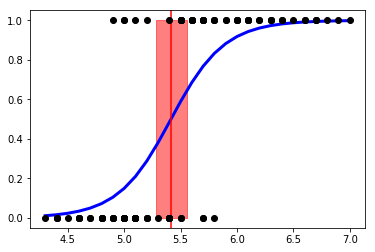

In [39]:
theta = trace['theta'].mean(axis=0)
idx = np.argsort(x0)
plt.plot(x0[idx], theta[idx], color='b', lw=3)
plt.axvline(trace['bd'].mean(), ymax=1, color='r')
bd_hpd = pm.hpd(trace['bd'])
plt.fill_betweenx([0,1], bd_hpd[0], bd_hpd[1], color='r', alpha=0.5)

plt.plot(x0, y0, 'o', color='k')
theta_hpd = pm.hpd(trace['theta'])[idx]
plt.fill_between(x0[idx], theta_hpd[:,0], theta[:,1], color='b', alpha=0.5)

plt.xlabel(x_n)
plt.ylabel(r'$theta$')

In [6]:
def classify (n, threshold):
    n = np.array(n)
    mu = trace['alpha'].mean() + trace['beta'].mean() * n
    prob = 1/ (1 + np.exp(-mu))
    return prob, prob>threshold
classify([5, 5.5, 6], 0.4)

(array([0.14484577, 0.59010166, 0.92444855]), array([False,  True,  True]))